<a href="https://colab.research.google.com/github/bartolomeoadrian/computer-vision/blob/main/09_mask_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar librerías

In [3]:
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121 -q
!pip install git+https://github.com/facebookresearch/detectron2.git -q

  Preparing metadata (setup.py) ... done


# Importar librerías

In [10]:
import cv2, numpy as np, urllib.request, numpy as np
from detectron2.utils.logger import setup_logger; setup_logger()
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode
from google.colab.patches import cv2_imshow
from detectron2.data import MetadataCatalog

[08/31 15:31:09 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


# Configuración

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = "cpu"
predictor = DefaultPredictor(cfg)


meta = MetadataCatalog.get("coco_2017_val")
thing_classes = meta.thing_classes

assert "sports ball" in thing_classes, thing_classes[:10]

SPORTS_BALL_ID = thing_classes.index("sports ball")

# Realizar predicción

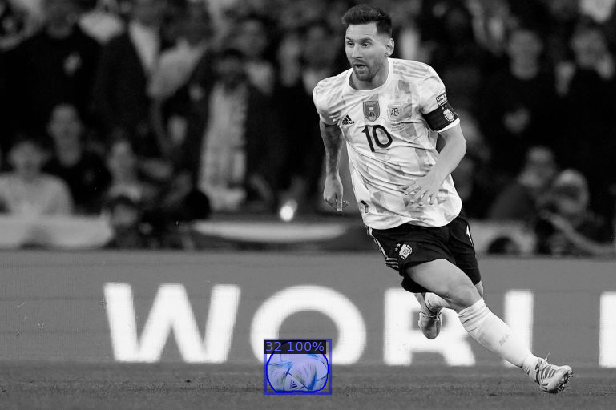

In [14]:
def read_url(url: str):
    data = urllib.request.urlopen(url).read()
    arr = np.frombuffer(data, np.uint8)
    return cv2.imdecode(arr, cv2.IMREAD_COLOR)

def draw_soccer_masks(img_bgr):
    out = predictor(img_bgr)
    inst = out["instances"].to("cpu")
    # Filtrar SOLO la clase sports ball
    keep = inst.pred_classes == SPORTS_BALL_ID
    inst = inst[keep]

    v = Visualizer(img_bgr[:, :, ::-1], scale=0.8, instance_mode=ColorMode.IMAGE_BW)
    vis = v.draw_instance_predictions(inst)
    return vis.get_image()[:, :, ::-1]

test_urls = [
  "https://www.aljazeera.com/wp-content/uploads/2022/11/AP22157409008795.jpeg?resize=770%2C513&quality=80",
]

for u in test_urls:
    img = read_url(u)
    vis = draw_soccer_masks(img)
    cv2_imshow(vis)